In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

seed = 0
c = -1.8
n_iterations = 500

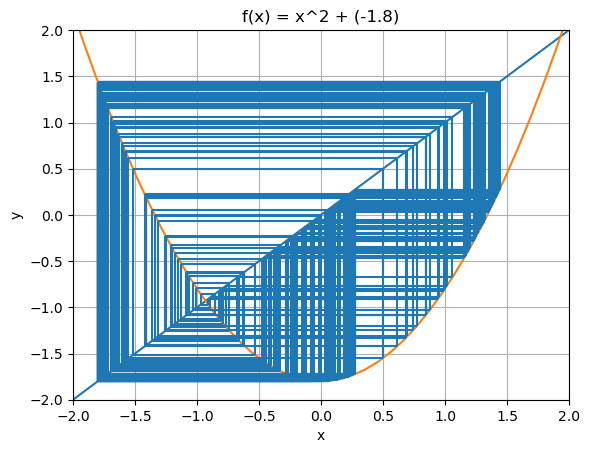

In [4]:
# establishing the figure
fig = plt.figure()
ax = plt.axes()

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"f(x) = x^2 + ({c})")
ax.grid()
#ax.set_facecolor('black')

# the iterated function
def function(x, c):
    y = x**2 + c
    return y

# the initial figure
x_range = np.linspace(-2,2,40)
y = x_range
plt.plot(x_range, y)

y_range = function(x_range, c)
plt.plot(x_range,y_range)

x = 0
x_values = []
i = 0
for i in range(n_iterations):
    i = i + 1
    if i % 2 != 0:
        x = function(x, c)
    else:
        x = x
    x_values.append(x)

i = 0
def iteration(i):
    up = True
    right = True
    if i % 2 != 0:
        # iterate horizontally
        if x_values[i] < function(x_values[i], c):
            right = False
        if (right is True):
            plt.hlines(y = function(x_values[i], c), xmin = function(x_values[i], c), xmax= x_values[i])
        else:
            plt.hlines(y = function(x_values[i], c), xmin = x_values[i], xmax= function(x_values[i], c))
    else:
        # iterate vertically
        if x_values[i] > function(x_values[i], c):
            up = False
        if (up is True):
            plt.vlines(x = x_values[i], ymin = function(x_values[i], c), ymax= x_values[i])
        else:
            plt.vlines(x = x_values[i], ymin = x_values[i], ymax= function(x_values[i], c))
    return

anim = FuncAnimation(fig, iteration, frames=n_iterations, interval = 80)
#display(HTML(anim.to_jshtml()))
#plt.close()
anim.save('cobweb.mp4', writer = 'ffmpeg', fps = 30)